# **World University Rankings 2025**

### **Authors:**  
**Nguyen Ngo, Josh Ilko**  
Penn State University  
DS 220 – Spring 2025  
May 5, 2025


## **1. Problem Space**
In this data analysis, we will answer exploratory questions about approximately 1,500 universities ranked by Quacquarelli Symonds (QS). The dataset includes numerous key indicators, including a school's name, location, region, 2024 and 2025 rankings, size, focus, status, and numerous other miscellaneous rankings, as well as an overall score. These factors provide a comprehensive representation and are taken into account as they were used to map out the overall placement of these institutions. The analysis of this dataset is aimed to provide insights for a range of stakeholders, including students, universities, administrators, etc.

## **2. Dataset Overview**
- **Source:** QS official release CSV (`data/QS World University Rankings 2025 (Top global universities).csv`) via Kaggle published on April 21st, 2025
- **Key columns:** `rank`, `university`, `country`, `region`, `overall_score`, `citations`, `sustainability`, `academic_reputation`, `international_students_pct`, `type` (public/private), `size`.
- **Relevance:** Columns map directly to our eight analysis questions.


## **3. Research Questions**
1. How many of the top 100 universities are in each country?
2. What is the average overall score of the top 600 universities in each region?
3. Which universities that were ranked in 2024 have increased in rank in 2025, and by how much?
4. How do sustainability scores between public and private universities compare?
5. Which universities have a perfect academic reputation score?
6. How many unversities of each size are there?
7. Which unversities have the most cited research?
8. Which unversities have the highest international student ratio?

## **4. Library Importation & Data Loading**

In [4]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # for correlation heatmap

# load the data
df = pd.read_csv(
    "/content/sample_data/QS World University Rankings 2025 (Top global universities).csv",
    encoding="latin1"
)

# check rows and columns
df.shape

(1503, 28)

## **5. Exploring Data & Data Cleaning**

### Exploring Data
Before conducting the analysis, inspecting the structure and contents of the data beforehand will guide the rest of the analysis process.

In [5]:
# inspect first few rows
df.head()
# get column info
df.info()
# stats summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RANK_2025                             1503 non-null   object 
 1   RANK_2024                             1482 non-null   object 
 2   Institution_Name                      1503 non-null   object 
 3   Location                              1503 non-null   object 
 4   Region                                1503 non-null   object 
 5   SIZE                                  1503 non-null   object 
 6   FOCUS                                 1503 non-null   object 
 7   RES.                                  1503 non-null   object 
 8   STATUS                                1466 non-null   object 
 9   Academic_Reputation_Score             1503 non-null   float64
 10  Academic_Reputation_Rank              1503 non-null   object 
 11  Employer_Reputati

,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_per_Faculty_Score,International_Faculty_Score,International_Students_Score,International_Research_Network_Score,Employment_Outcomes_Score,Sustainability_Score
count,1503.000000,1503.000000,1503.000000,1503.000000,1403.000000,1445.000000,1502.000000,1503.000000,1484.000000
mean,20.286693,19.787292,28.128676,23.503460,30.736707,25.580346,50.129095,23.825083,24.309299
std,22.326168,23.784738,27.613017,27.870692,34.344365,31.098689,29.866588,27.351315,31.074718
min,1.300000,1.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000
25%,6.300000,4.300000,7.300000,2.800000,4.200000,2.900000,22.725000,4.000000,1.300000
50%,11.000000,9.400000,16.000000,9.900000,12.500000,9.600000,51.100000,11.800000,6.750000
75%,23.500000,25.300000,40.400000,36.400000,51.600000,38.300000,77.100000,33.400000,39.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


We see 1,503 rows and 28 columns. The overall scores range roughly from 30 to 100.

### Check For Null Values
The first step in our data cleaning is to determine which columns have null values, how many null values they have, and how to deal with these columns.

In [6]:
df.isnull().sum().sort_values(ascending=False)

,0
Overall_Score,902
International_Faculty_Rank,100
International_Faculty_Score,100
International_Students_Score,58
International_Students_Rank,58
STATUS,37
RANK_2024,21
Sustainability_Score,19
Sustainability_Rank,19
International_Research_Network_Score,1


### Clean the Data
We will use two different methods to deal with columns with null values. For the "Overall_Score" column, we will only use this attribute to analyze the top 600 universities, as those are the schools that were given an overall score by QS. For all other columns, we will exclude rows with null values only for any queries involving the attribute in question. This will better maintain the integrity of the data than filling null values with the median or mean of the column, as carelessly filling values with summary statistics could misrepresent the outputs of our queries. Additionally, there are relatively few rows with null values for any given attribute in the grand scheme of the dataset, so the results of our queries will remain reliable.

In [7]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Clean and convert the rank columns
df["rank_2025"] = df["rank_2025"].astype(str).str.replace("=", "").str.extract(r"(\d+)").astype("Int64")
df["rank_2024"] = df["rank_2024"].astype(str).str.replace("=", "").str.extract(r"(\d+)").astype("Int64")

# Clean and convert the "sustainability_score" column
df["sustainability_score"] = pd.to_numeric(
    df["sustainability_score"]
    .astype(str)
    .str.replace("=", "", regex=False),
    errors="coerce"
)

# Convert the "overall_score" column to numeric
df["overall_score"] = pd.to_numeric(df["overall_score"], errors="coerce")

# Clean and convert "rank" columns with + signs
rank_cols = [col for col in df.columns if "rank" in col.lower()]

for col in rank_cols:
    df[col] = pd.to_numeric(
        df[col].astype(str).str.replace("+", "", regex=False),
        errors="coerce"
    )

# Rename and fill values in the "status" column
df["status"] = df["status"].replace({
    "A": "Public",
    "B": "Private",
    "C": "Unknown"
}).fillna("Unknown")


To clean the data, we need to do a few things. First, we strip the column names of any white space and set them to lowercase to ensure easy access in future code. Then, we make sure that each value in the rank_2024 and rank_2025 columns is a single float value instead of a range like "601-610". After that, we clean the sustainability_score and any columns with "rank" in the name, removing any "+" or "=" signs in the cell values and ensuring the values are numeric. Finally, we improve the clarity of the status column, replacing values of "A", "B", and "C" with "Public", "Private", and "Unkown", respectively, as well as filling null values with "Unknown".

## **6. Data Analysis**
### Filtering, Intepretation, and Visualization of Data:



### 1. Top 100 Universities By Country

---




In [8]:
# Select only universities ranked within the top 100
top_100 = df[df["rank_2025"] <= 100]

# Count the number of top 100 universities in each country
top_100_by_country = top_100["location"].value_counts()

# print countries and their counts
print(top_100_by_country)

location
United States       25
United Kingdom      15
Australia            9
Hong Kong SAR        5
China (Mainland)     5
South Korea          5
Germany              5
France               4
Canada               4
Japan                4
Singapore            2
Switzerland          2
Netherlands          2
Sweden               2
Malaysia             1
New Zealand          1
Belgium              1
Taiwan               1
Argentina            1
Ireland              1
Brazil               1
Chile                1
Russia               1
Mexico               1
Denmark              1
Name: count, dtype: int64


**Intepretation:** The United States hosts 25 of the Top 100 Universities which is more than any other nation. It is followed by the United Kingdom with 15. The US and UK are dominant hubs of elite higher education.

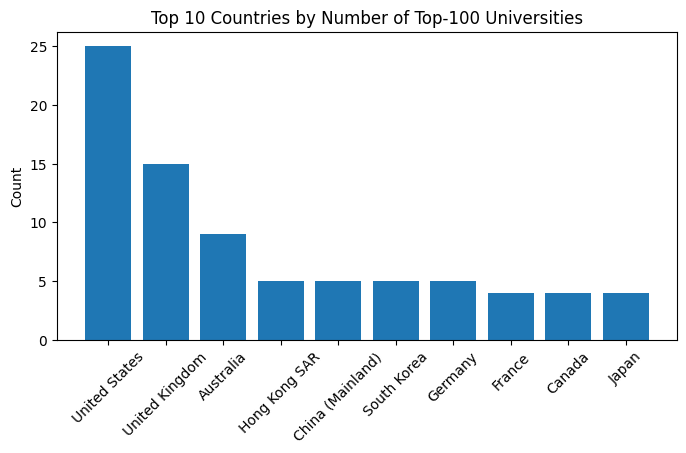

In [9]:
# Visualization - Bar Chart:
top100 = df[df.rank_2025 <= 100]['location'].value_counts().head(10)
plt.figure(figsize=(8,4))
plt.bar(top100.index, top100.values)
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Number of Top-100 Universities')
plt.ylabel('Count')
plt.show()

### 2. Average Overall Score by Region (Top 600)

---



In [10]:
# Select only universities ranked within the top 600
top_600 = df[df["rank_2025"] <= 600]

# Take the mean of the overall scores of the universities in each region
avg_score_by_region = top_600.groupby("region")["overall_score"].mean()

# Sort the countries by mean descending
avg_score_by_region = avg_score_by_region.sort_values(ascending=False)

# Print the regions and scores in descending order
print(avg_score_by_region)

region
Oceania     47.323077
Americas    47.178862
Europe      41.023887
Asia        38.607143
Africa      32.911111
Name: overall_score, dtype: float64


**Intepretation:** Oceania leads with an average overall score of 47.32, closely followed by the Americas with 47.18, while regions such as Africa average around 33. This indicates a significant regional performance gaps.

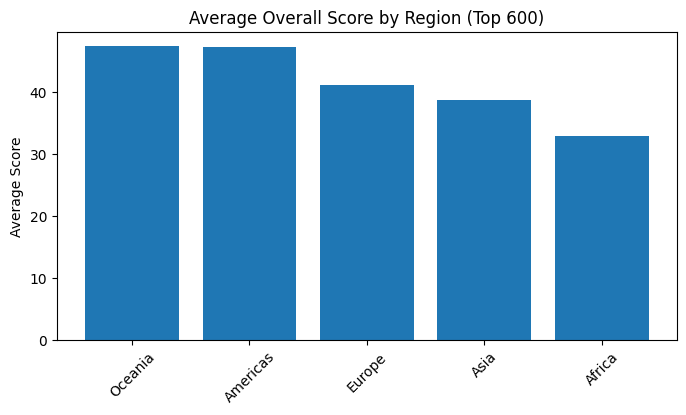

In [11]:
# Intepretation: Bar Chart
top600 = df[df.rank_2025 <= 600]
avg_region = top600.groupby('region')['overall_score'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
plt.bar(avg_region.index, avg_region.values)
plt.xticks(rotation=45)
plt.title('Average Overall Score by Region (Top 600)')
plt.ylabel('Average Score')
plt.show()

### 3. Year-Over-Year Rank Increase (2024-2025)

---



In [12]:
# Filter out rows with missing 2024 rank data
ranked_both_years = df[df["rank_2024"].notna()]

# Create a new data frame including only rows where the rank has improved between years
improved = ranked_both_years[ranked_both_years["rank_2025"] < ranked_both_years["rank_2024"]].copy()

# Ensure rank 2024 is type int
improved["rank_2024"] = improved["rank_2024"].astype("Int64")

# Create a new row indicating how much a university's rank improved
improved["rank_change"] = improved["rank_2024"] - improved["rank_2025"]

# Print only relevant attributes of the new data frame
print(improved[["institution_name", "rank_2024", "rank_2025", "rank_change"]])

                                      institution_name  rank_2024  rank_2025  \
1                              Imperial College London          6          2   
9         California Institute of Technology (Caltech)         15         10   
10                          University of Pennsylvania         12         11   
12                         The University of Melbourne         14         13   
13                                   Peking University         17         14   
...                                                ...        ...        ...   
1323                           Universidad de Tarapaca       1401       1201   
1335  Universidad Nacional Autónoma de Honduras (UNAH)       1401       1201   
1341                      Universidad Nacional del Sur       1401       1201   
1351       Universidade Federal do Rio Grande Do Norte       1401       1201   
1368                          University of Kragujevac       1401       1201   

      rank_change  
1               4  

**Intepretation:** Among universities present in both years, Califoria Institute of Technology improved by 5 places, revealing which institutions gained momentum from 2024 to 2025.

### 4. Sustainability Scores: Public vs Private Universities

---



In [ ]:
# Filter out rows with missing sustainability scores
sustainability_by_type = df[df["sustainability_score"].notna()]

# Group by "status" and calculate both mean and median
sustainability_stats = sustainability_by_type.groupby("status")["sustainability_score"].agg(["mean", "median"])

# Sort the university types by mean descending
sustainability_stats = sustainability_stats.sort_values(by="mean", ascending=False)

# Print the mean and median by unversity type
print(sustainability_stats)

              mean  median
status                    
Public   27.031665    9.50
Private  18.321429    2.95
Unknown   4.422989    1.20


**Intepretation:** Public universities average a sustainability score of 27.0 compared to 18.3 for private universities. This suggests that public schools in this dataset implement stronger sustainability practices. It is important to note that outliers could influence the score for private institutions as displayed by the graph below.

<ipython-input-13-984f17b48a13>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sust[sust.status=='Public'].sustainability_score,


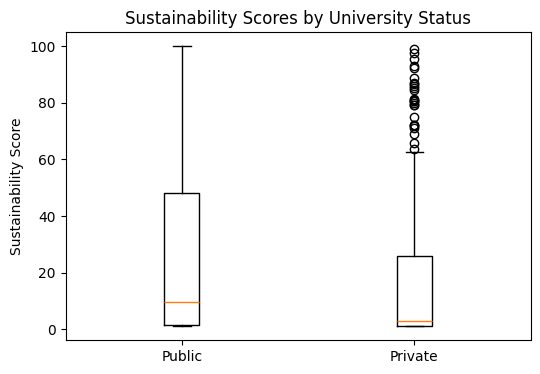

In [13]:
# Visualization - Boxplot
sust = df[['status','sustainability_score']].dropna()
plt.figure(figsize=(6,4))
plt.boxplot([sust[sust.status=='Public'].sustainability_score,
             sust[sust.status=='Private'].sustainability_score],
            ticklabels=['Public','Private'])
plt.title('Sustainability Scores by University Status')
plt.ylabel('Sustainability Score')
plt.show()

### 5. Perfect Academic Reputation Scores (count = 100)

---



In [14]:
# Select only rows with an academic reputation score of 100 (a perfect score)
perfect_reputation = df[df["academic_reputation_score"] == 100]

# Print the name and score of each university with a perfect score
print(perfect_reputation[["rank_2025", "institution_name", "academic_reputation_score"]])

    rank_2025                              institution_name  \
0           1  Massachusetts Institute of Technology (MIT)    
2           3                          University of Oxford   
3           4                            Harvard University   
4           5                       University of Cambridge   
5           6                           Stanford University   
11         12      University of California, Berkeley (UCB)   
32         32                       The University of Tokyo   
41         42  University of California, Los Angeles (UCLA)   

    academic_reputation_score  
0                       100.0  
2                       100.0  
3                       100.0  
4                       100.0  
5                       100.0  
11                      100.0  
32                      100.0  
41                      100.0  


**Intepretation:** Universities with the highest academic reputation scores are located in the US, with 5 dominating the list. University of Oxford and University of Cambridge are in the UK, and the University of Tokyo is in Asia. This could correlate back to Analysis #1 where the data indicated that the US and UK dominated the college scene.

### 6. Count by University Sizes

---



In [16]:
# Get the counts of each size university
size_counts = df["size"].value_counts()

# Reorder the data frame in size order descending
ordered_sizes = size_counts.reindex(["XL", "L", "M", "S"])

# Output the size counts
print(ordered_sizes)

size
XL    352
L     691
M     372
S      88
Name: count, dtype: int64


**Intepretation:** Large campuses (L) account for 691 universities, followed by medium (M) with 372, extra‑large (XL) with 352, and small (S) with 88. This reflects that most ranked institutions are large.

### 7. Top Cited Research Universities

---



In [17]:
# sort the data frame by highest citation per faculty score
top_citations = df.sort_values(by="citations_per_faculty_score", ascending = False)

# print the rank, name, score of the first top 10 universities by citation per faculty score
print(top_citations[["rank_2025", "institution_name", "citations_per_faculty_score"]].head(10))

     rank_2025                                   institution_name  \
0            1       Massachusetts Institute of Technology (MIT)    
9           10       California Institute of Technology (Caltech)   
3            4                                 Harvard University   
61          62                       City University of Hong Kong   
358        359  Gwangju Institute of Science and Technology (G...   
382        383                                    Anna University   
402        403                 Amirkabir University of Technology   
21          22                               Princeton University   
182        183                       Hamad Bin Khalifa University   
325        326  Daegu Gyeongbuk Institute of Science and Techn...   

     citations_per_faculty_score  
0                          100.0  
9                          100.0  
3                          100.0  
61                         100.0  
358                        100.0  
382                        100

**Intepretation:** MIT, Caltech, and Harvard top the list in citations per faculty. Each institute score 100 which highlights their research impact.

### 8. Highest International Student Ratio


---



In [18]:
# Sort the data frame by highest international student ratio
top_international_students = df.sort_values(by="international_students_score", ascending=False)

# Print the rank, name, and score of the first top 10 universities by international student ratio
print(top_international_students[["rank_2025", "institution_name", "international_students_score"]].head(10))

      rank_2025                                   institution_name  \
25           26                                               EPFL   
17           18                           The University of Sydney   
1056       1001                     London Metropolitan University   
463         464         Macau University of Science and Technology   
51           50  The London School of Economics and Political S...   
802         801                        Al-Ahliyya Amman University   
748         741                          University of Westminster   
61           62                       City University of Hong Kong   
890         851                        University of Hertfordshire   
40           40                       The University of Queensland   

      international_students_score  
25                           100.0  
17                           100.0  
1056                         100.0  
463                          100.0  
51                           100.0  
802    

**Intepretation:** EPFL and the University of Sydney lead with perfect international student scores of 100. This indicates that these campuses are the most globally diverse.

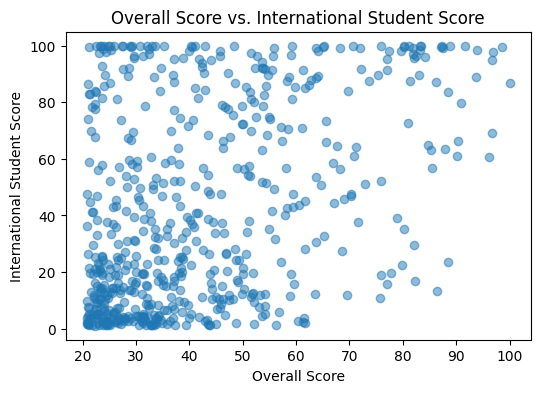

In [19]:
# Scatter
plt.figure(figsize=(6,4))
plt.scatter(df.overall_score, df.international_students_score, alpha=0.5)
plt.title('Overall Score vs. International Student Score')
plt.xlabel('Overall Score')
plt.ylabel('International Student Score')
plt.show()

## **7. Key Takeaways**
#### **Limitation:**


1. Missing overall_score for many universities.
2. Fundings and external (government) and institutional policies could influence the overall scores.
3. Some universities might not report data for certain metrics that were taken into account.

#### **Conclusion:**

*   This analysis illustrates how global higher-education excellence remains concentrated in regions and showcases how certain institutions continue to dominate, yet also reveals important areas for growth. The US and UK collectively host over a third of the world's Top 100 Universities. This indicates their leadership but also highlights the competitive potential of other nations. Regional average scores shows that the difference between continents in terms of education presents untapped opportunities for capacity building and targeted investment to strengthen educational quality across the world. The sustainability comparison suggests that public institutions in this dataset outperform private ones. Morover, the correlation between research citations, overall score and internation student diversity clearly indicates to the importance of integrating scholarships and global engagements between institutions across the world.
*   Future research can be done to explore other important key factors such as
 fundings, faculty quality, student outcomes, etc. and how these drivers impact the overall performances of institutions across the world.

